In [1]:
# Homework 2

# Reference: Kaggle, towardsdatascience, geeksforgeeks, medium. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [4]:
# STEP 1

In [5]:
heart_data = pd.read_csv('data.csv')
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# How many observations are there in total? 303 

heart_data.shape[0]

303

In [7]:
# Are there any missing values? No. All of columns have the same amount of observations, 303 non-null. 

heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
# How many unique values are in each column?

heart_data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [10]:
# Which columns will you treat as categorical, which will you take as continuous, and why?

# Categorical: sex, cp, fbs, restecg, exng, slp, caa, and thall. Because those variables contain a finite number of categories or distinct groups.

# Continous: age, trtbps, chol, thalachh, and oldpeak. Because those variables are numeric variables that have an infinite number of values between any two values.

In [11]:
# STEP 2 

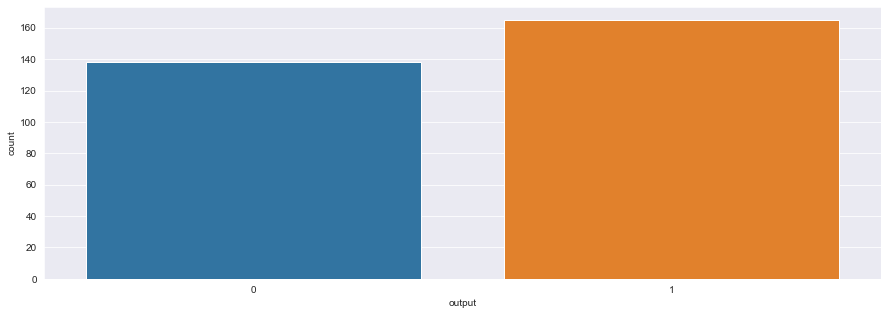

In [12]:
sns.countplot(x=heart_data['output'])

plt.show()

In [13]:
# Is the dataset balanced? In other words, is there an equal representation of people prone to heart attacks and those who are not. 

heart_data['output'].value_counts()

# There are 165 people have high chance of heart attack and 138 people have low chance of heart attack.

# The ratio between high and low chance of heart attack is 1.19:1 which means the dataset is imbalanced

1    165
0    138
Name: output, dtype: int64

In [14]:
# Is working with a balanced dataset important? Why or why not?

# Imbalanced dataset will cause a bias in favor of the majority class. Working with a balance dataset will increase accuracy for model and prediction. 

# Balanced dataset also is easier to evaluate because there is none bias. 

In [15]:
# How can we deal with an imbalanced dataset?

# Reduce the data from majority class until both have the same amount.

# Increase the data from minority class until both have the same amount.

# Choose another metrics which are more balanced than the previous one.

In [16]:
# STEP 3

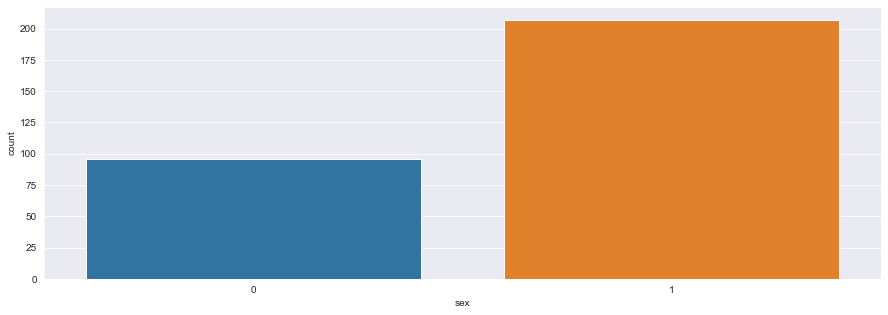

In [17]:
sns.countplot(x=heart_data['sex'])
plt.show()

In [18]:
# There are more female than male in this data

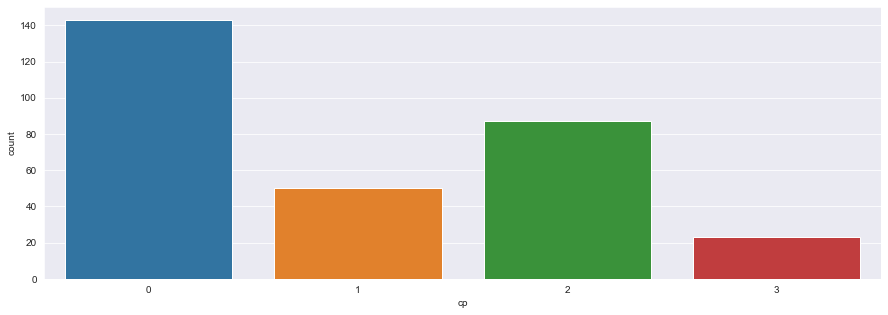

In [19]:
sns.countplot(x=heart_data['cp'])
plt.show()

In [20]:
# There are 4 different types of chest pain. And the type "0" has most, around 140. 

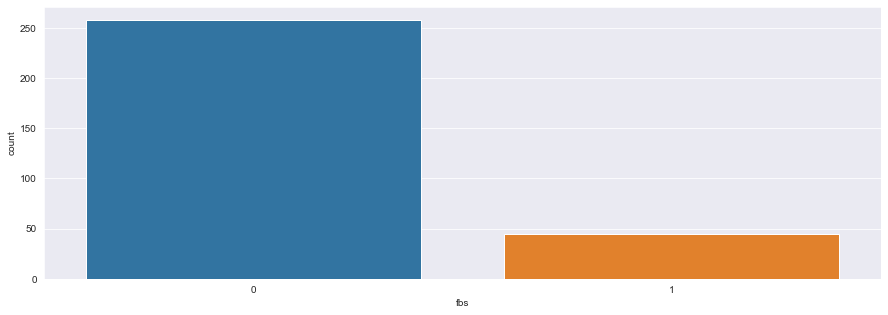

In [21]:
sns.countplot(x=heart_data['fbs'])
plt.show()

In [22]:
# Fbs is fasting blood sugar > 120 mg/dl where 1 = True, 0 = False. And more observations don't have fbs. 

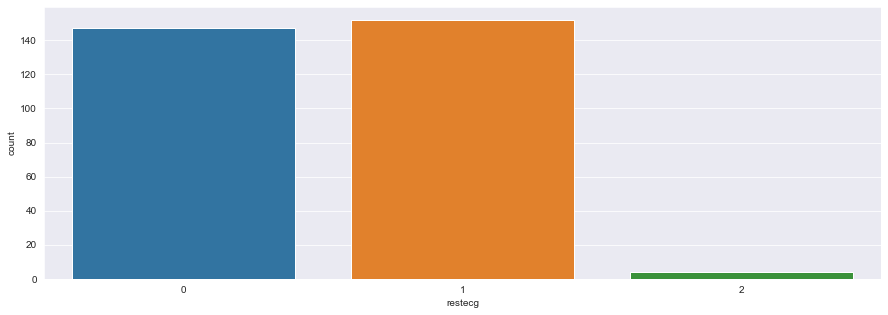

In [23]:
sns.countplot(x=heart_data['restecg'])
plt.show()

In [24]:
# Resting electrocardiographic results where 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

# The number of people have normal and ST-T are the same. There are few people have Left ventricular hypertrophy.

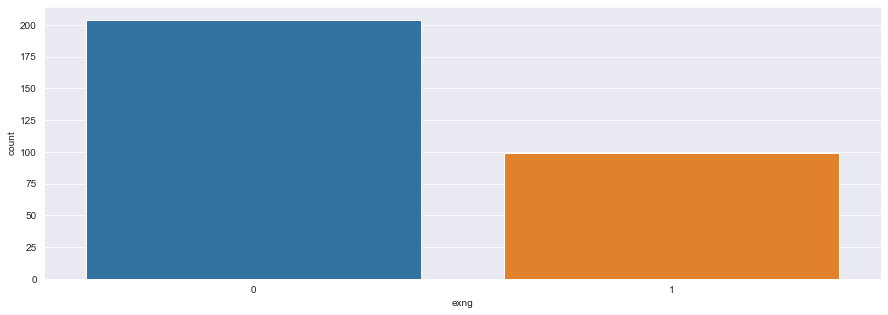

In [25]:
sns.countplot(x=heart_data['exng'])
plt.show()

In [26]:
# Exercise induced angina where 1 = Yes, 0 = No. More people don't exercise induced angina

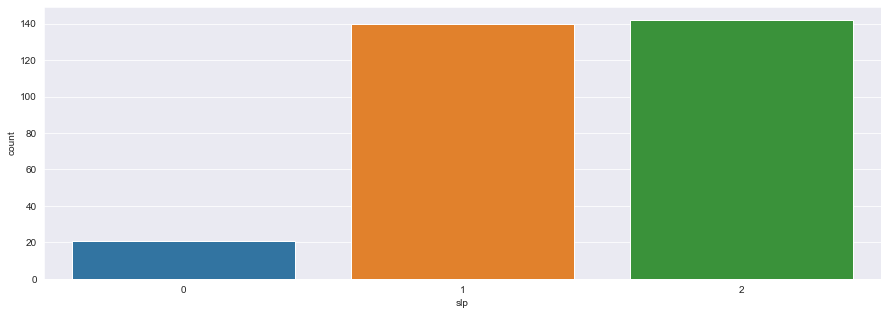

In [27]:
sns.countplot(x=heart_data['slp'])
plt.show()

In [28]:
# Slope 1 and 2 are majority. 

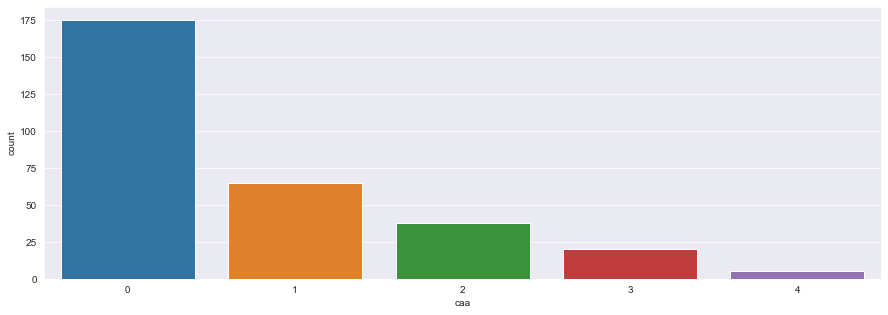

In [29]:
sns.countplot(x=heart_data['caa'])
plt.show()

In [30]:
# There are 4 different Number of major vessels. 0 is the most and 4 is the least. 

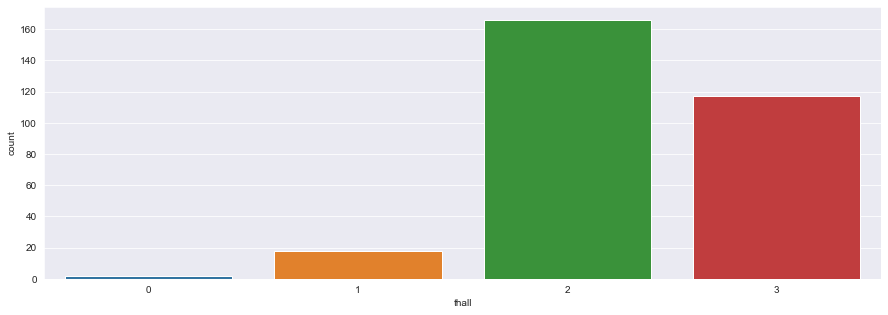

In [31]:
sns.countplot(x=heart_data['thall'])
plt.show()

In [32]:
# There are 4 Thalium Stress Test result ~ (0,3). 2 is the most and 0 is the least. 

In [33]:
# STEP 4

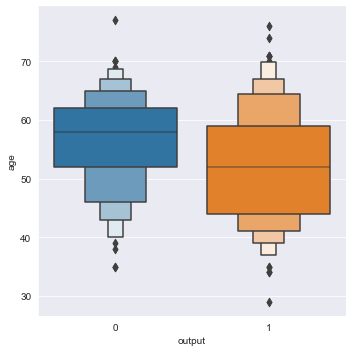

In [34]:
sns.catplot(x= 'output', y = 'age' , data=heart_data , kind = 'boxen')
plt.show()

In [35]:
# The older you are, the higher chance you can heart attack. 

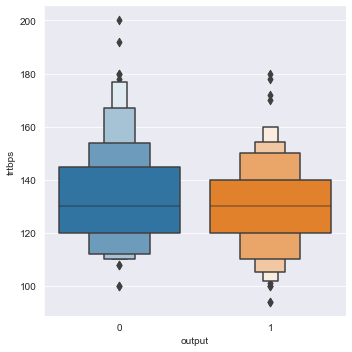

In [36]:
sns.catplot(x= 'output', y = 'trtbps' , data=heart_data , kind = 'boxen')
plt.show()

In [37]:
# Resting blood pressure (in mm Hg). Low chance heart attack have trtbps around 120 to 143. High chance heart attack have trtbps around 120 to 140

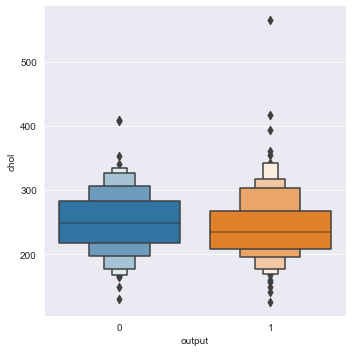

In [38]:
sns.catplot(x= 'output', y = 'chol' , data=heart_data , kind = 'boxen')
plt.show()

In [39]:
# Cholesterol. Low chance heart attack have cholesterol around 210 to 280. High chance heart attack have cholesterol around 200 to 260

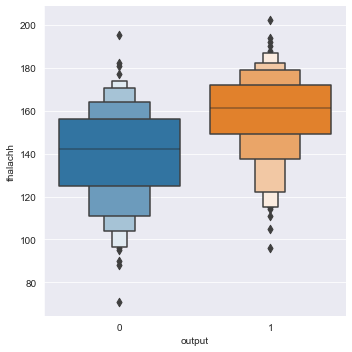

In [40]:
sns.catplot(x= 'output', y = 'thalachh' , data=heart_data , kind = 'boxen')
plt.show()

In [41]:
# Maximum heart rate achieved. 

# Low chance heart attack have thalachh around 130 to 155. High chance heart attack have thalachh around 150 to 170

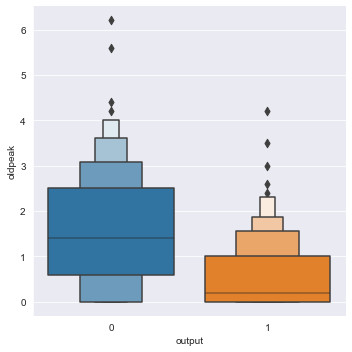

In [42]:
sns.catplot(x= 'output', y = 'oldpeak' , data=heart_data , kind = 'boxen')
plt.show()

In [43]:
# Previous peak

# Low chance heart attack have oldpeak around 0.5 to 2.5. High chance heart attack have oldpeak around 0 to 1

In [44]:
# STEP 5

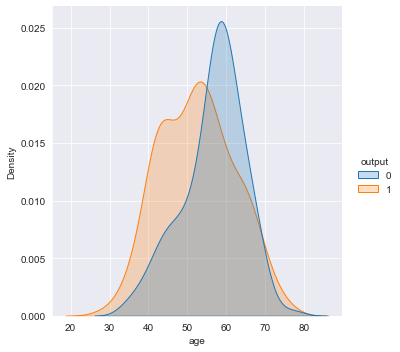

In [45]:
sns.displot(heart_data, x="age", hue="output", kind ='kde', fill=True)

In [46]:
# People at age around 55 have highest chance of heart attack. 

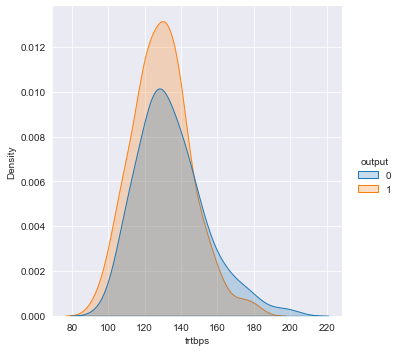

In [47]:
sns.displot(heart_data, x="trtbps", hue="output", kind ='kde', fill=True)

In [48]:
# # People at trtbps around 135 have highest chance of heart attack. 

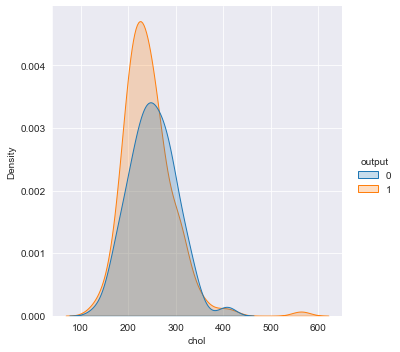

In [49]:
sns.displot(heart_data, x="chol", hue="output", kind ='kde', fill=True)

In [50]:
# People have cholesterol around 210 have highest chance of heart attack. 

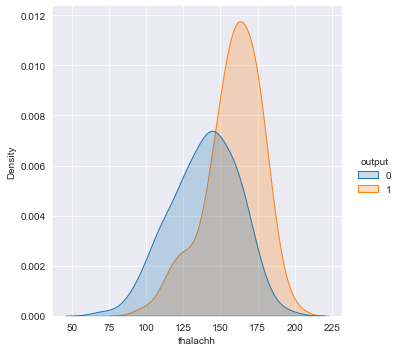

In [51]:
sns.displot(heart_data, x="thalachh", hue="output", kind ='kde', fill=True)

In [52]:
# People have maximum heart rate achieved around 175 have highest chance of heart attack. 

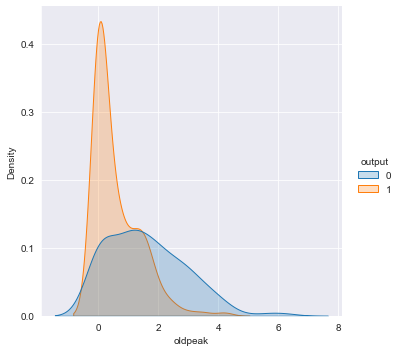

In [53]:
sns.displot(heart_data, x="oldpeak", hue="output", kind ='kde', fill=True)

In [54]:
# People don't have previous peak have highest chance of heart attack. 

In [55]:
# STEP 6

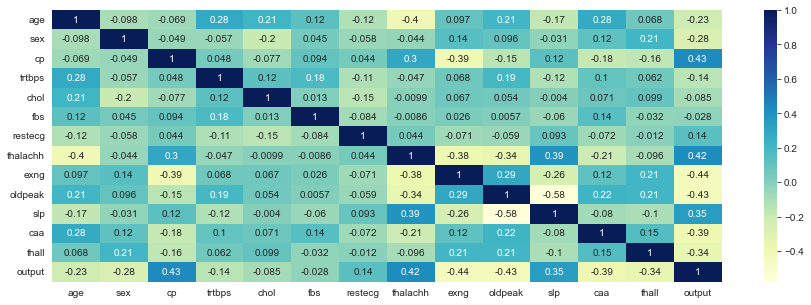

In [56]:
sns.heatmap(heart_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [57]:
# What can you conclude from the heatmap you created? Are there any interesting findings?

# A heatmap above contains values representing in heart attack data. Usually the darker shades of the chart represent higher values than the lighter shade. 

# It helps discover which variables are related to each other.

In [58]:
# STEP 7

<AxesSubplot:xlabel='age', ylabel='cp'>

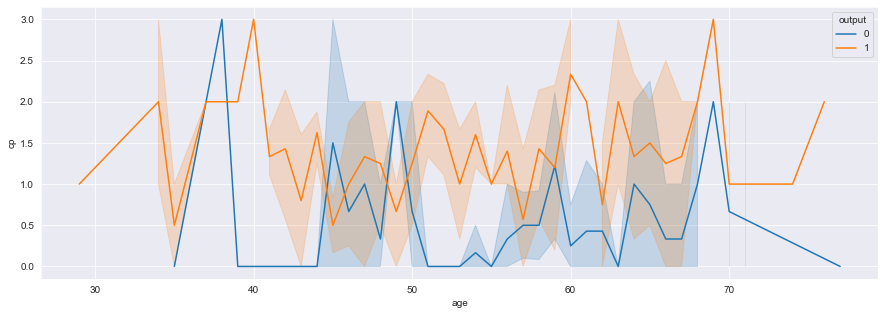

In [59]:
sns.lineplot(data=heart_data, x="age", y="cp", hue = "output")

In [60]:
# Chest pain are various depend on age. Chest pain type of 1 or above have higher chance of heart attack. 

<AxesSubplot:xlabel='sex', ylabel='age'>

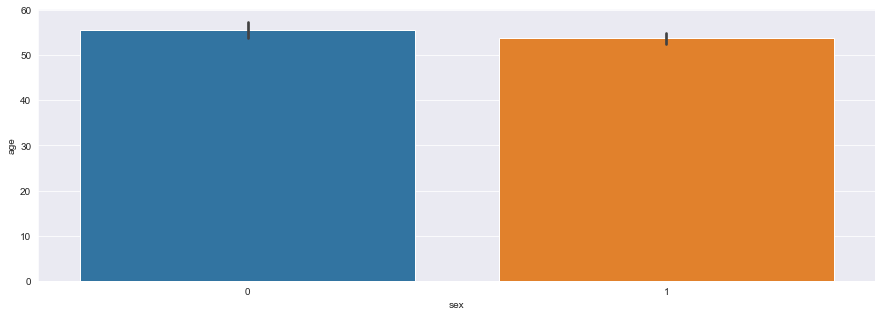

In [61]:
sns.barplot(x='sex', y='age', data=heart_data)

In [62]:
# Male are older than female. 

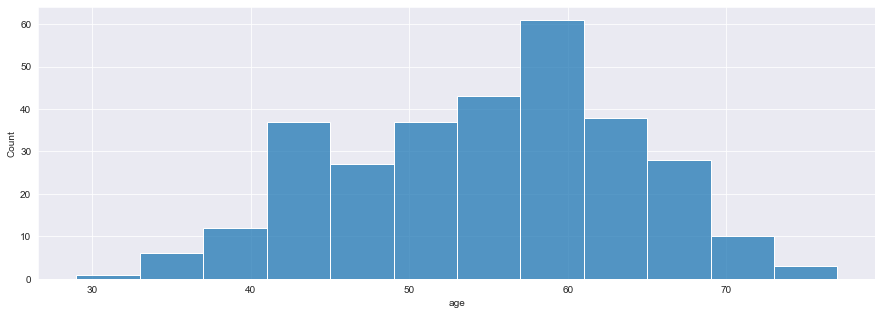

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [63]:
sns.histplot(x=heart_data['age'].dropna())
plt.show()
heart_data['age'].describe()

In [64]:
# The average age seems to be ~55, with 75% of people onboard being 61 years of age or younger.

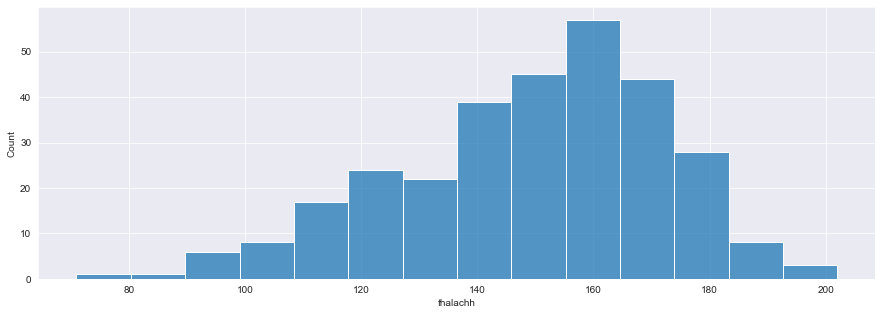

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalachh, dtype: float64

In [65]:
sns.histplot(x=heart_data['thalachh'])
plt.show()
heart_data['thalachh'].describe()

In [66]:
# The average person has 149 maximum heart rate achieved, with 75% of people achieved 166 heart rate or less.

In [67]:
# STEP 8

In [68]:
# Name two different models that you can use to solve the problem statement.

# I will use k-Nearest Neighbors model and Logistic Regression model. 

In [69]:
# What is the difference between label encoding and one hot encoding, and when should you use one over the other?

# Label encoding: assign labels with a value from 0 to n-1 where n is the number of labels. 

# Example: Excellent, good, bad, good. After label encoding, those become 2, 1, 0, 1 which 0 is bad, 1 is good, and 2 is excellent.

# One hot encoding: create n columns where n is the number of unique values that the nominal variable can take.

# Example: Excellent, good, bad. We will just create three new columns namely rank_excellent, rank_good, and rank_bad. 

# If the rank is good then the values of rank_excellent and rank_bad column will be 0 and value of rank_good column will be 1.

# One hot encoding is better than label encoding because there are different data in the same column, if we apply label encoding, it may makes model misunderstand that data is in rank, like 0<1<2<3<4<5.

In [70]:
# What is multicollinearity, and why do we care about it when creating models? How can we check to see if there’s significant multicollinearity in our data?

# Multicollinearity occurs in our dataset when we have features which are strongly dependent on each other. 

# We care about it when creating model because if we have multicollinearity in our dataset then we won’t be able to use our weight vector to calculate the feature importance.

# Multicollinearity impacts the interpretability of our model.

# We apply pairplot to check multicollinearity. 

In [71]:
# Why is scaling data important?

# If we want to get the best data, we need to mix all data not by their size but based on their right proportion.

# Machine learning only sees numbers and treats those as same. Scaling makes all numbers equal and favors no side.

# Scaling makes values close to each other. It helps the algorithm trained well and faster. 

In [72]:
# For the two different models that you named earlier, are they using a parametric or nonparametric learning algorithms? What’s the difference?

# Logistic Regression is parametric learning algorithms

# KNN is non-parametric learning algorithms.

# Parametric learning algorithms require model to make prediction, estimate or learn from trainning data, define the skill of the model.

# Non-parametric learning algorithms are used for continuos values while parametric learning algorithms is for discrete values.

# Non-parametric learning algorithms requires bigger amount of data and slower. 

In [73]:
# Suppose that we had missing values in our dataset. What are different ways we could handle them?

# 1. Use .info() or .isnull().sum to check which data is missing. 

# 2. Delete rows which have null values or missing too many values.

# 3. Replace missing values by mean/median/mode of its value. 

# 4. Assign value such as "Unknown" or "N/A" to missing value. 

# 5. Predict missing values by algorithms

In [74]:
# Copy data

heart_data2 = heart_data.copy()
heart_data2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
# Categorical and Continous 

categorical = ['sex','exng','caa','cp','fbs','restecg','slp','thall'];

continuous = ["age","trtbps","chol","thalachh","oldpeak"];

heart_data2 = pd.get_dummies(heart_data2, columns = categorical, drop_first = True)

heart_data2.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,exng_1,caa_1,caa_2,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [76]:
# Assign X and Y. 

X = heart_data2.drop(['output'],axis=1)
y = heart_data2[['output']]

In [77]:
# Scaling

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

scaler = RobustScaler()

X[continuous] = scaler.fit_transform(X[continuous])

X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [78]:
# Training Data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [79]:
# Logistic Regression 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve

logreg = LogisticRegression() 

logreg.fit(X_train, np.ravel(y_train))

predictions = logreg.predict(X_test)

y_pred_proba = logreg.predict_proba(X_test)

y_pred = np.argmax(y_pred_proba,axis=1)

print("The test accuracy score of Logistric Regression is", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is 0.9016393442622951


In [80]:
from sklearn.model_selection import cross_val_score

# Applying 10-Fold Cross Validation
scores = cross_val_score(logreg, X_train, np.ravel(y_train), cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.8        0.84       0.875      0.83333333 0.75       0.75
 0.875      0.91666667 0.75       0.83333333]

Average cross-validation score: 0.8223


In [81]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

[[27  2]
 [ 4 28]]


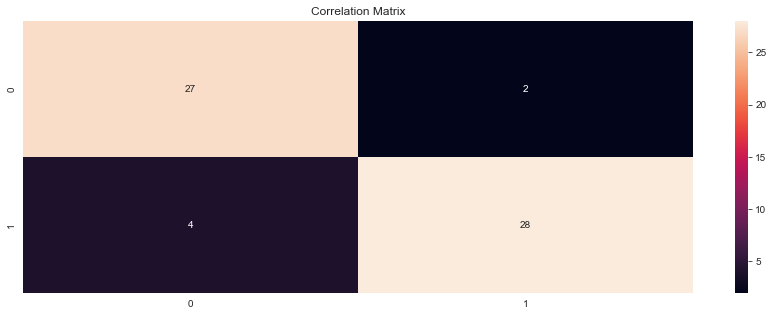

In [82]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [83]:
# KNN Model

from sklearn.neighbors import KNeighborsClassifier

# will append scores here for plotting later
test_scores = []
train_scores = []

# testing k values from 1-14
for i in range(1,15):
    # create a model with k=i
    knn = KNeighborsClassifier(i)
    # train the model
    knn.fit(X_train,np.ravel(y_train))
    
    # append scores. 
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    


In [84]:
from sklearn.model_selection import cross_val_score

# Applying 10-Fold Cross Validation
scores = cross_val_score(knn, X_train, np.ravel(y_train), cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.72       0.76       0.83333333 0.75       0.70833333 0.75
 0.79166667 0.875      0.75       0.83333333]

Average cross-validation score: 0.7772


In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

print("The test accuracy score of Logistric Regression is", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

[[27  2]
 [ 5 27]]
The test accuracy score of Logistric Regression is 0.8852459016393442


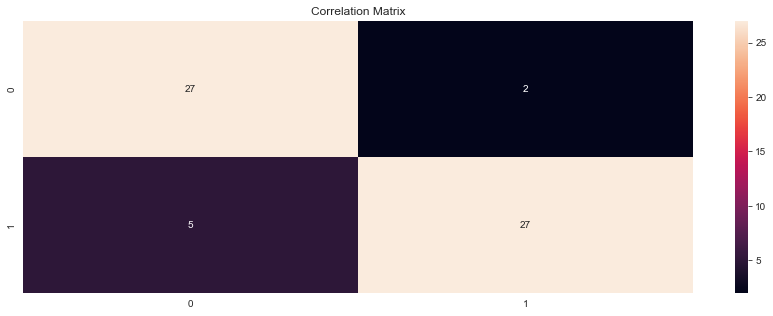

In [86]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [87]:
# STEP 9 

# Logistic Regression Model has higer accuracy than KNN Model, 0.9 > 0.88. 

# Using the mean cross-validation, we can conclude that we expect the Logistic Regression model to be around 0.8223% accurate on average.

# Using the mean cross-validation, we can conclude that we expect the KNN model to be around 0.7772% accurate on average.

# I using RobustScaler to scaling data because it is based on percentiles. 

# RobustScaler removes the median and scales the data in the range. Therefore, it is not influenced by a few number of very large marginal outliers.

# I choose those two models because we learn and test in the exam 1. 